# Anàlisi exploratòria de dades

## Importació de les biblioteques

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sweetviz
import sweetviz as sv

### Importació de les dades i mostra d'informació rellevant d'aquestes.

In [212]:
df = pd.read_csv('bank_dataset.csv')


In [213]:
df.head() #Mostrem els cinc primer registres de la mostra.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Manejar valors faltants i outliers

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [216]:
df.isnull().sum() #Sabem els valors nuls que hi ha per cada columna i veiem que hi ha més a l'edat, la situació civil i el nivell educatiu

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

Com es tracta d'una mostra amb molts registres i hi ha pocs valors nuls, es podria optar pel mètode de caiguda de dades, que serveix per eliminar característiques perdudes. Concretament, eliminarem les observacions amb valors que tinguin nuls.

In [223]:
eliminados = df.dropna()
eliminados.isnull().sum() #Realitzem la suma dels registres nulls i veiem que ja no hi ha.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [225]:
eliminados.info() #Tornem a obtenir la informació  de les nostres dades

<class 'pandas.core.frame.DataFrame'>
Index: 11140 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11140 non-null  float64
 1   job        11140 non-null  object 
 2   marital    11140 non-null  object 
 3   education  11140 non-null  object 
 4   default    11140 non-null  object 
 5   balance    11140 non-null  int64  
 6   housing    11140 non-null  object 
 7   loan       11140 non-null  object 
 8   contact    11140 non-null  object 
 9   day        11140 non-null  int64  
 10  month      11140 non-null  object 
 11  duration   11140 non-null  int64  
 12  campaign   11140 non-null  int64  
 13  pdays      11140 non-null  int64  
 14  previous   11140 non-null  int64  
 15  poutcome   11140 non-null  object 
 16  deposit    11140 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.5+ MB


### Identificar característiques rellevants

Utilitzem el mètode de filtre per seleccionar les variables més rellevants del nostre model. Aquí es podria utilitzar la 
correlació de Pearson perquè les variables explicatives són numèriques o categòriques i la variable resultat numèrica si es recodifica.
En aquest cas, hauríem de recodificar les variables categòriques i la variable resultat haurà de ser 0 "no contractació" i 1 "contractació del dipòsit". 
Com les dades no són nostres, es deixarà només el codi que s'hauria de fer servir.


In [236]:
# Calcular la matriu de correlació  amb les variables numèriques. Ens mostrarà la intensitat i la direcció de la relació entre les variables
correlation = df.corr(numeric_only=True)
print(correlation)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.112217 -0.000418  0.000139 -0.005358  0.002593  0.020060
balance   0.112217  1.000000  0.010467  0.022436 -0.013894  0.017411  0.030805
day      -0.000418  0.010467  1.000000 -0.018511  0.137007 -0.077232 -0.058981
duration  0.000139  0.022436 -0.018511  1.000000 -0.041557 -0.027392 -0.026716
campaign -0.005358 -0.013894  0.137007 -0.041557  1.000000 -0.102726 -0.049699
pdays     0.002593  0.017411 -0.077232 -0.027392 -0.102726  1.000000  0.507272
previous  0.020060  0.030805 -0.058981 -0.026716 -0.049699  0.507272  1.000000


## Identificar outliers

S'utilitzarà la biblioteca seaborn per identificar valors atípics. Valorarem dues.


In [242]:
df['age'].describe() #Analitxem la variable edat.

count    11152.000000
mean        41.235384
std         11.914934
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

La mitjana d'edat està en 41 i veiem que el màxim d'edat són 95, de manera que els valors atípics estaran més
a prop d'aquest número.

Text(0.5, 0, 'Edat')

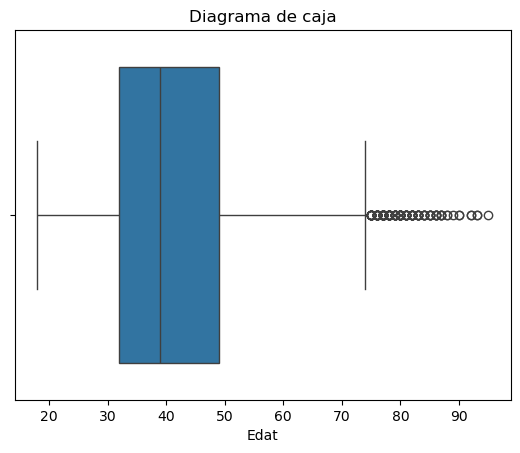

In [244]:
#Analitem l'edat.

g = sns.boxplot(data = df, x = 'age')
g.set_title('Diagrama de caja')
g.set_xlabel('Edat')

Veiem que l'edad mitjana està entre 30 i 50 anys i que els casos atípics, que estàn molt per sobre, comencen aproximadament a partir dels 75 anys.